# Learning Curve

## Main Questions

With this experiement with investigate if additional training data would benefit a three different simple models.

In [1]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from aimanager.utils.utils import make_dir
from aimanager.utils.merge import merge_files_by_name

sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})


run = 'learning_curve'

folder = f'../../data/training/{run}/train'
plot_folder = f'plots/{run}'

make_dir(plot_folder)

In [3]:
metrics_df = merge_files_by_name(folder, 'metrics.parquet')
confusion_matrix_df = merge_files_by_name(folder, 'confusion_matrix.parquet')
synthethetic_df = merge_files_by_name(folder, 'synthetic_predicitions.parquet')


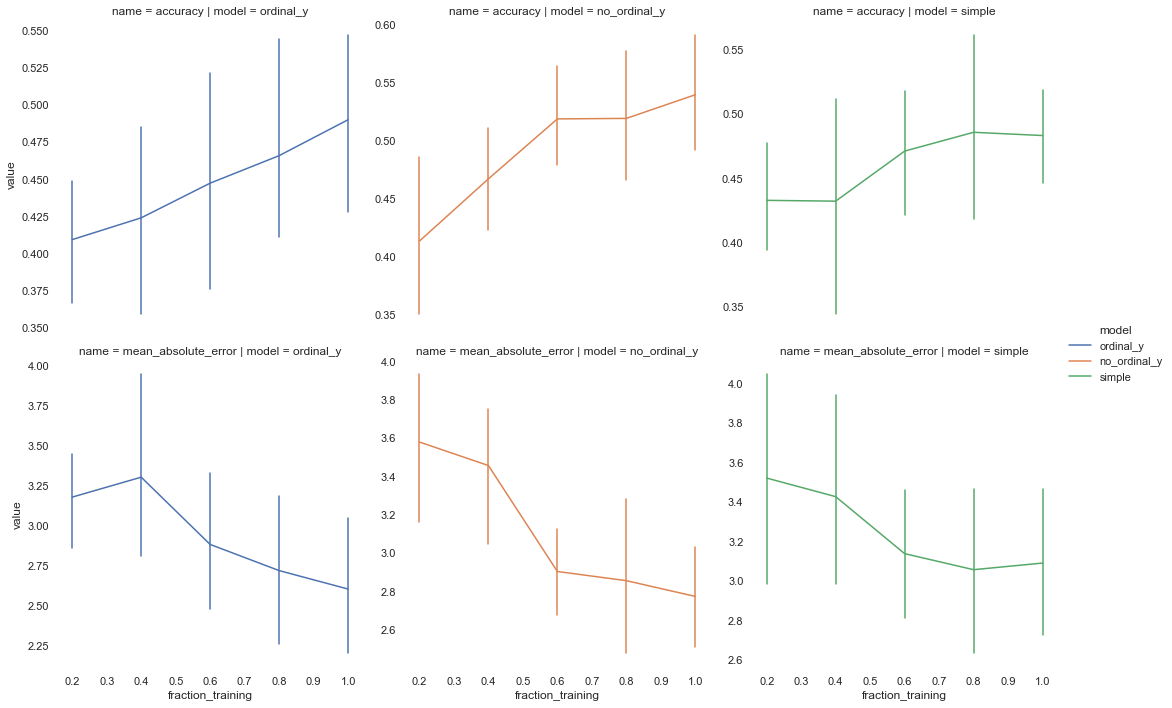

In [15]:
w = (
    (metrics_df['name'].isin(['accuracy', 'mean_absolute_error'])) &
    (metrics_df['set'] == 'test')
)
df = metrics_df[w]
df = df.sort_values('fraction_training')
df = df.reset_index()
sns.relplot(
    data=df, y='value', row='name', x='fraction_training', hue='model',
    col='model', kind='line', facet_kws={'sharey': False, 'sharex': True},
    err_style='bars'
    )

## Results

With increasing data, out-of-sample accuracy is increasing and mean absolute error is decreasing.
Only the most simple model does show an saturation effect. With increasing data utilization from 0.6 -> 1.0 the other models are still linearly improving performance. The performance of those models is increasing beyond the performance of the more simple model.

## Conclusions

The analysis suggest that additional data would be beneficial to increase model performance. 